# About Dataset and Aurthur 



Multi-Class MRI Brain Tumor Classification Using Convolutional Neural Networks  
Abdulwahid Kolawale Aliyu  
Intern at NCAIR Nigeria  
December 3, 2024

---

### Table of Contents

1. About the Data
2. Imports & Setup
3. Imports Data
4. Data Processing
5. Data Visualization
6. Building CNN
7. End of Notebook

---

### About the Data

This dataset contains four categories of brain tumors: pituitary, glioma, meningioma, and normal. The dataset was curated by cleaning the brain tumor MRI dataset, which is available at this link. The cleaning process included eliminating duplicate entries, fixing incorrect image labels, and resizing all images to a uniform size of 224x224 pixels.

#### Types of Brain Tumors

- Pituitary tumor: A growth located in the pituitary gland, a small gland at the base of the brain. Pituitary tumors may be benign or malignant.
- Glioma: A tumor that originates in the glial cells, which provide support and protection for neurons. Gliomas are the most prevalent type of brain tumor.
- Meningioma: A tumor that forms in the meninges, the protective membranes surrounding the brain and spinal cord. Meningiomas are typically benign, but in some cases, they can be malignant.
- Normal: A brain scan showing no evidence of a tumor.

---

### Data Cleaning Process

The data cleaning procedure involved several key steps:

- Removal of duplicate samples: This was achieved through an image vector comparison method.
- Correction of mislabeled images: Each image was reviewed carefully, and any mislabeled images were corrected.
- Image resizing: All images were resized to a uniform dimension of 224x224 pixels.

---

### Data Augmentation

To improve the diversity and robustness of the dataset, various image augmentation techniques were applied to the images, without modifying their labels. The following augmentation methods were used:

- Salt and pepper noise: Introduces random noise by setting pixels to either black or white, based on a defined intensity.
- Histogram equalization: Enhances the contrast and details of the images.
- Rotation: Rotates the images by a specified angle, either clockwise or counterclockwise.
- Brightness adjustment: Alters the brightness by adding or subtracting intensity values.
- Horizontal and vertical flipping: Flips the images to create mirror images, either horizontally or vertically.

---

### Use Cases and Potential Investigations

This dataset has various potential applications in advanced medical research and analysis. Some possible use cases include:

- Tumor classification: Developing advanced machine learning models to accurately and automatically classify brain tumors.
- Treatment planning: Analyzing tumor characteristics to assist in treatment planning and decision-making processes.
- Radiomics analysis: Extracting quantitative features from the images for radiomics analysis, which can reveal valuable insights and patterns.
- Comparative studies: Conducting comparative studies across different tumor types to understand their distinct features and behaviors.

---

### Acknowledgment

We extend our sincere thanks to the original dataset publisher, M. Hossein Hashemi, for their invaluable contribution to the research community.

---

### License

This dataset is released under the CC0 license, making it freely accessible for use. changes!pecific research purposes.

---

Let me know if you need any further adjustments!

## Imports & Setup

In [1]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define the number of classes (Normal, Glioma, Meningioma, Pituitary)
CLASS_TYPES = ['Normal', 'Glioma', 'Meningioma', 'Pituitary']
N_TYPES = len(CLASS_TYPES)


#### Importing Data

In [2]:
# Define a function to load images from a directory (directly in grayscale)
def load_images_from_folder(folder, label):
    """
    Loads all images from a given folder, preprocesses them, 
    and returns them with a label encoded.
    """
    images = []
    labels = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        img = tf.io.read_file(filepath)  
        img = tf.image.decode_jpeg(img, channels=1)  # Load images directly in grayscale (1 channel)
        img = tf.image.resize(img, size=(150, 150))  # Resize to match model's input shape
        img = img / 255.0  # Normalize the image
        
        images.append(img)
        labels.append(label)
    
    return images, labels

# Load and preprocess the images for each class
normal_images, normal_labels = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Normal', 0)
glioma_images, glioma_labels = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Tumor/glioma_tumor', 1)
meningioma_images, meningioma_labels = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Tumor/meningioma_tumor', 2)
pituitary_images, pituitary_labels = load_images_from_folder('/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor', 3)

# Combine all images and labels into a single list
images = normal_images + glioma_images + meningioma_images + pituitary_images
labels = normal_labels + glioma_labels + meningioma_labels + pituitary_labels

# Convert to NumPy arrays
images_np = np.array(images)
labels_np = np.array(labels)


#### Data Processing

In [3]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images_np, labels_np, test_size=0.2, random_state=42)

#### Data Visualization

### Pie Chart for Dataset Distribution

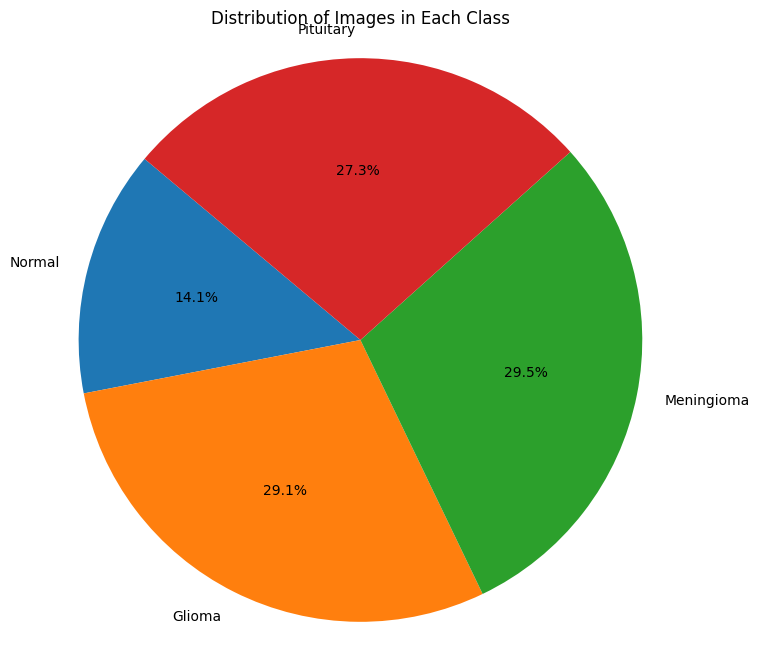

In [4]:
import matplotlib.pyplot as plt
# Count the number of images in each class
class_counts = [np.sum(labels_np == i) for i in range(N_TYPES)]

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=CLASS_TYPES, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Distribution of Images in Each Class")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


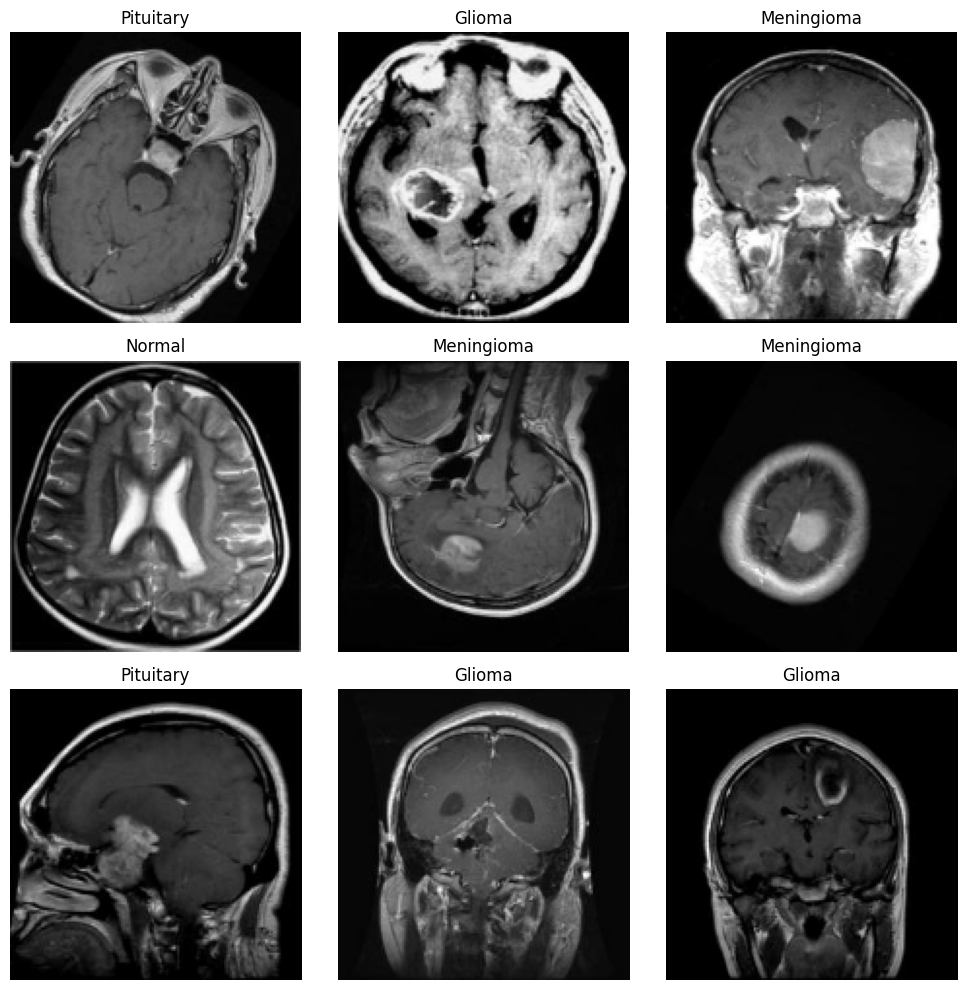

In [5]:
import matplotlib.pyplot as plt

# Display a few sample images with labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(150, 150), cmap='gray')
    plt.title(CLASS_TYPES[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


#### Building the CNN

In [6]:
# Build the CNN model for grayscale images
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),  # 1 channel for grayscale
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(N_TYPES, activation='softmax')  # Output layer for 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,292 (18.42 MB)

 Trainable params: 4,828,292 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Fit the model using training data
history = model.fit(
    X_train,  # Training images
    y_train,  # Training labels
    epochs=20,  # Set the number of epochs
    validation_data=(X_test, y_test)  # Validation data (testing data)
)

Epoch 1/20


I0000 00:00:1733404212.173375      71 service.cc:145] XLA service 0x78579c0052f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733404212.173431      71 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733404212.173438      71 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 10/542 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3477 - loss: 1.5664 

I0000 00:00:1733404216.334960      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


542/542 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.5920 - loss: 0.9477 - val_accuracy: 0.8288 - val_loss: 0.4509
Epoch 2/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8739 - loss: 0.3331 - val_accuracy: 0.9213 - val_loss: 0.2181
Epoch 3/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9590 - loss: 0.1167 - val_accuracy: 0.9421 - val_loss: 0.1890
Epoch 4/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9844 - loss: 0.0482 - val_accuracy: 0.9421 - val_loss: 0.1867
Epoch 5/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9916 - loss: 0.0248 - val_accuracy: 0.9559 - val_loss: 0.1711
Epoch 6/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9955 - loss: 0.0154 - val_accuracy: 0.9596 - val_loss: 0.1705
Epoch 7/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9571 - val_loss: 0.2112
Epoch 8/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9957 - loss: 0.0147 - val_accurac

##  Training Performance Visualization (Accuracy and Loss)

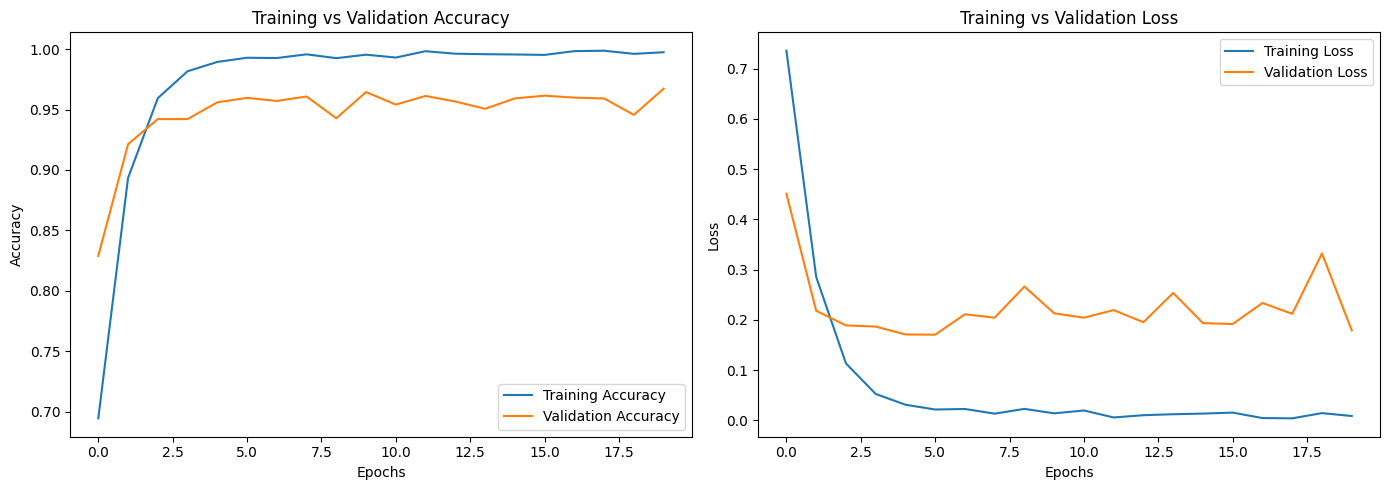

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Save the model 
model.save('brain_tumor_cnn_model_96%.h5')

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


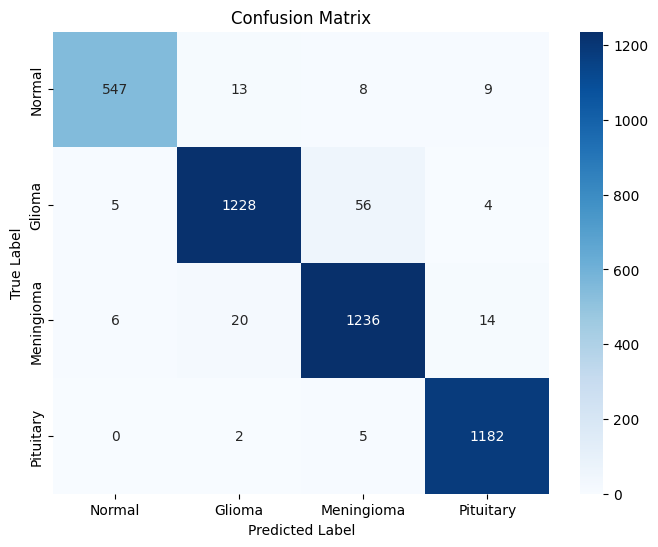

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_TYPES, yticklabels=CLASS_TYPES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
